# qBraid

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ionq-samples/getting-started/blob/main/qbraid.ipynb)

[qBraid](https://github.com/qBraid/qBraid) is platform-agnostic quantum runtime framework. Distinguishing itself through a streamlined and highly-configurable approach to cross-platform integration, the qBraid-SDK does not assume a fixed target software framework. Instead, it allows providers to dynamically register any desired run input program type as the target, depending on their specific needs.

In [ ]:
%%capture

# First, we install the essential libraries to our current Python runtime.
# "%%capture" (above) captures and in this case, hides the output of this
# cell, so you can comment it out if you need help debugging this step.

%pip install qbraid matplotlib pyqasm

In [ ]:
from qbraid.runtime.ionq import IonQProvider
from helpers import get_ionq_api_key

# Before you begin, get your API key from https://cloud.ionq.com/settings/keys

# If your API key is stored as "IONQ_API_KEY" in your local environment, this
# should find it. Otherwise you'll be prompted to enter your API key manually.

api_key = get_ionq_api_key()

provider = IonQProvider(api_key=api_key)

In [ ]:
# Now we set up our circuit using OpenQASM 3. In this case, we're creating a
# circuit with two qubits, applying an H gate to qubit-0, a CX gate to both.

program = """
OPENQASM 3;
include "stdgates.inc";
qubit[2] q;
h q[0];
cx q[0], q[1];
"""

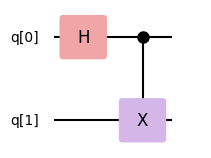

In [ ]:
# Before submitting the job, we can visualize the circuit using pyqasm.draw().
from pyqasm import draw

draw(program)

In [ ]:
device = provider.get_device("simulator")
job = device.run(program, name="qBraid example", shots=100)
results = job.result()

counts = results.data.get_counts()

print(counts)

{'00': 50, '11': 50}


In [ ]:
# And once the job has run, we can plot the results.

from qbraid.visualization import plot_histogram

plot_histogram(counts)

## And that's a wrap!

To continue learning with qBraid, check out more examples and documentation at https://docs.qbraid.com/